In [13]:
import scanpy as sc
import pandas as pd
import numpy as np
sc.settings.verbosity=3

In [2]:
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# show figures in the notebook
%matplotlib inline 


# sc.settings.set_figure_params(dpi=300) # save umaps as non-vectorial hi-res images
# # plt.rcParams['figure.figsize']=(10,10) # make figures square if not using the setting above

# show figures in the notebook
%matplotlib inline

In [4]:
import sys
# sys.path.append('/home/angela/src/scVI_TSP/')
# sys.path.append('/home/angela/sapiens/tabula-sapiens/')
# from utils.annotations_utils import *
# from utils.colorDict import *
# from utils.general_utils import *
# from utils.plotting_utils import *

In [8]:
scRFEtissue = pd.read_csv('/Users/madelinepark/Downloads/senis_facs_tfs_tissue_5000 (1).csv')

In [9]:
scRFEtissue

,Unnamed: 0,Aorta,Aorta_gini,BAT,BAT_gini,Bladder,Bladder_gini,Brain_Myeloid,Brain_Myeloid_gini,Brain_Non-Myeloid,...,Skin,Skin_gini,Spleen,Spleen_gini,Thymus,Thymus_gini,Tongue,Tongue_gini,Trachea,Trachea_gini
0,0,Tcf15,0.022214,Nr4a1,0.067631,Fosl1,0.061255,Mafb,6.143958e-02,Zic2,...,Trp63,0.081629,Ets1,0.051737,Tcf7,0.100294,Pitx1,0.126506,Nr4a1,0.019815
1,1,Sox18,0.020300,Klf2,0.061987,Atf4,0.045607,Sall1,5.843693e-02,Olig1,...,Gata3,0.075240,Spib,0.048777,Satb1,0.065808,Pax9,0.100484,Bhlhe40,0.016565
2,2,Meox2,0.019596,Junb,0.024337,Foxq1,0.045480,Maf,4.073518e-02,Tsc22d1,...,Tfap2b,0.070704,Cebpd,0.044518,Bcl11b,0.052532,Klf5,0.063420,Atf3,0.015662
3,3,Epas1,0.018314,Jund,0.023947,Mafk,0.038414,Ier2,3.328113e-02,Epas1,...,Fos,0.051337,Ikzf3,0.035961,Jun,0.046343,Barx2,0.053610,Klf9,0.015558
4,4,Myc,0.017457,Btg2,0.022696,Tbx3,0.037175,Irf8,3.247352e-02,Cebpb,...,Barx2,0.048150,Nfia,0.033969,Fos,0.039240,Sox15,0.051755,Nr4a3,0.014862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,1056,NaN,NaN,NaN,NaN,NaN,NaN,Lhx3,5.803117e-08,Foxi3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1057,1057,NaN,NaN,NaN,NaN,NaN,NaN,Ferd3l,1.277744e-09,Gsc2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1058,1058,NaN,NaN,NaN,NaN,NaN,NaN,Sry,0.000000e+00,Zscan4f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1059,1059,NaN,NaN,NaN,NaN,NaN,NaN,Prop1,0.000000e+00,Figla,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
tiss_scRFE = ['Aorta', 'BAT', 'Bladder', 'Brain_Myeloid', 'Brain_Non-Myeloid', 
                       'Diaphragm', 'GAT', 'Heart','Kidney', 'Large_Intestine',
                       'Limb_Muscle','Liver','Lung','MAT','Mammary_Gland','Marrow',
                       'Pancreas','SCAT','Skin','Spleen','Thymus','Tongue','Trachea']

In [24]:
sns.set(font_scale=.75) 

for t in tiss_scRFE:
    print(t)
    genes = (scRFEtissue[t][0:20])
    ginis = (scRFEtissue[t+'_gini'][0:20])
        plotRes[t] = sns.scatterplot(x=scRFEres[t][label+'_gini'][0:20], y=scRFEres[t][label][0:20])
#     print(ginis)

Aorta
BAT
Bladder
Brain_Myeloid
Brain_Non-Myeloid
Diaphragm
GAT
Heart
Kidney
Large_Intestine
Limb_Muscle
Liver
Lung
MAT
Mammary_Gland
Marrow
Pancreas
SCAT
Skin
Spleen
Thymus
Tongue
Trachea


In [41]:
cd /Users/madelinepark/Downloads

/Users/madelinepark/Downloads


In [57]:
def scatterplotResults (scRFEres, tissueList, seq, nEst):
    plotRes = {}
    for t in tissueList: 
        plt.figure()
        print(t)
        plotRes[t] = sns.scatterplot(x=scRFEres[t+'_gini'][0:20]*100, y=scRFEres[t][0:20])
        plotRes[t].invert_yaxis()
        plotRes[t].set(xlabel=t+'_mean_decres_gini%', ylabel = t+'_genes')
        plotRes[t].set_title('scRFE_'+t+'_'+seq+'_'+nEst)
        
        plt.savefig(t+'_'+seq+'_'+nEst+'nEst'+'.pdf')

Aorta
BAT
Bladder
Brain_Myeloid
Brain_Non-Myeloid
Diaphragm
GAT
Heart
Kidney
Large_Intestine
Limb_Muscle
Liver
Lung
MAT
Mammary_Gland
Marrow
Pancreas
SCAT
Skin
Spleen


/Users/madelinepark/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


Thymus
Tongue
Trachea


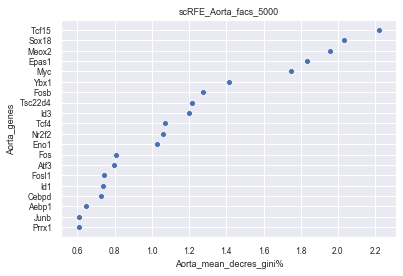

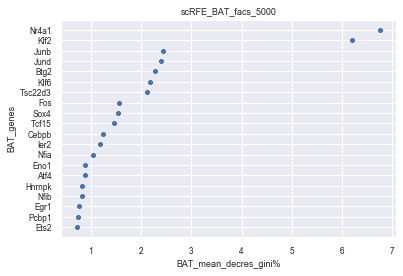

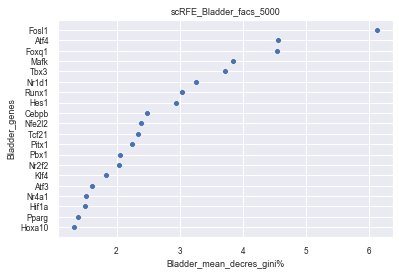

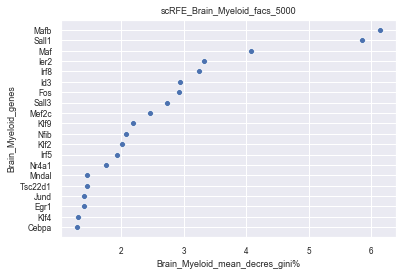

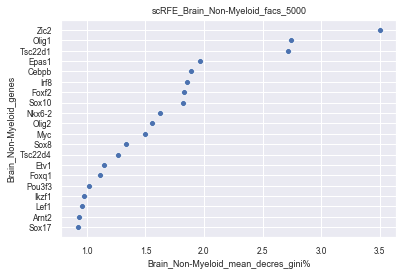

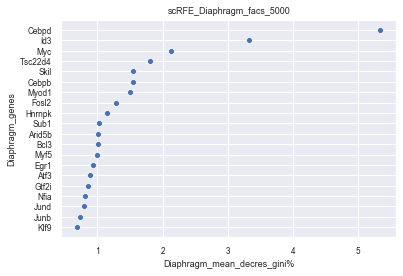

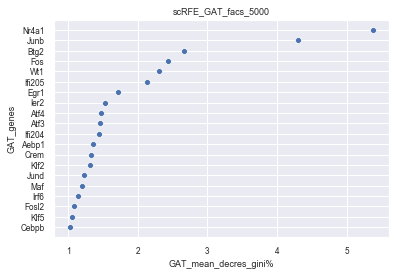

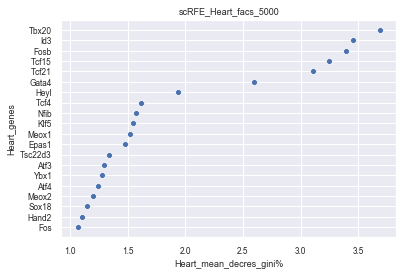

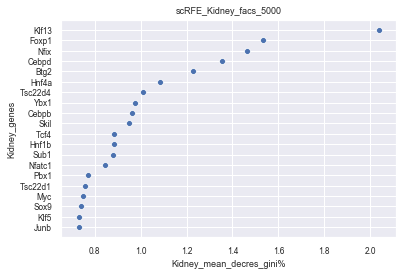

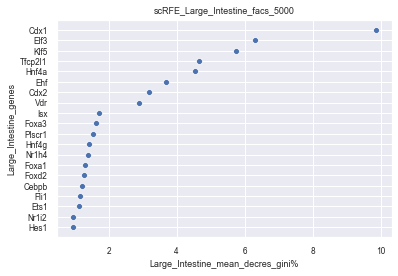

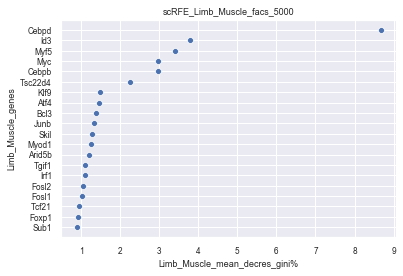

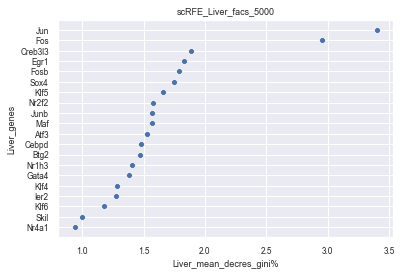

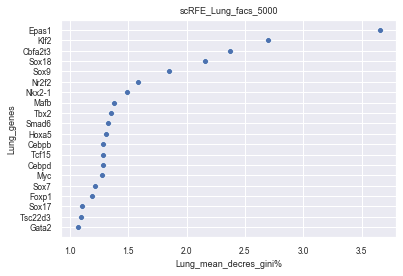

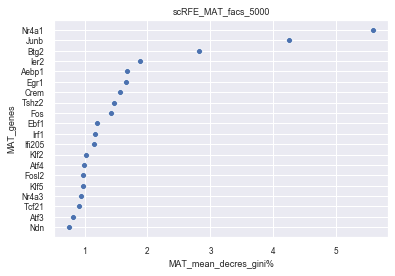

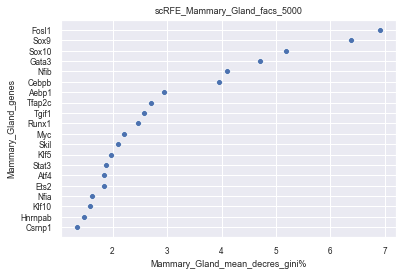

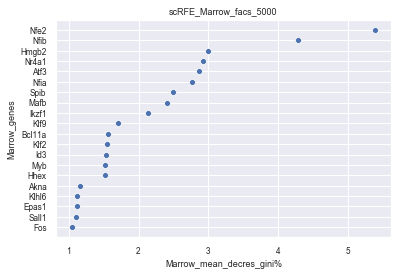

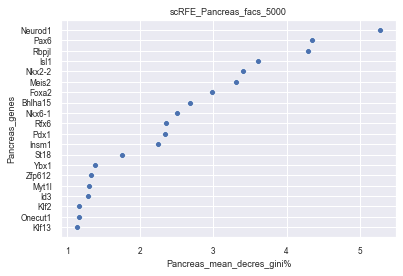

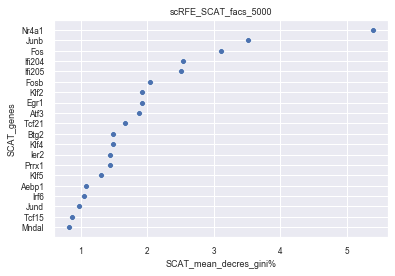

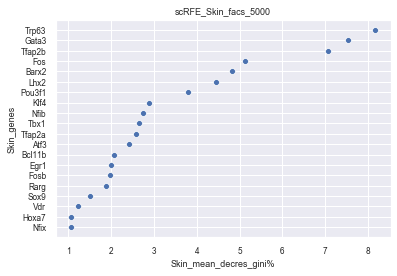

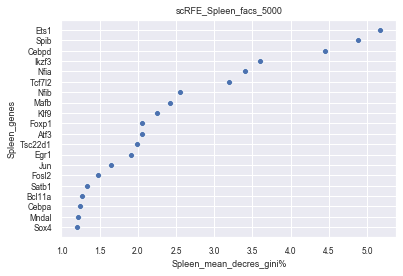

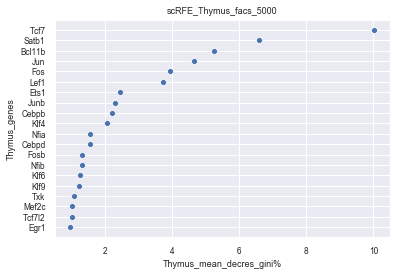

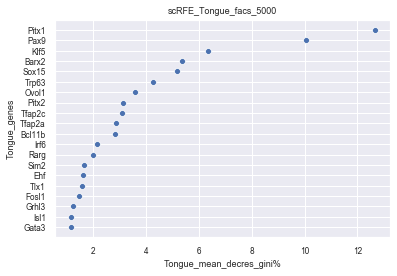

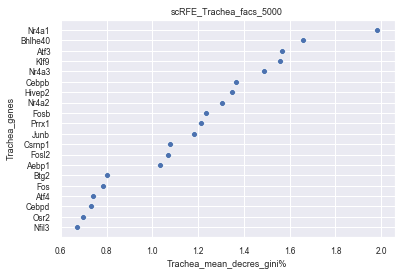

In [58]:
scatterplotResults(scRFEres = scRFEtissue, tissueList = tiss_scRFE, seq='facs', nEst='5000')